In [0]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline
import os
os.environ["CUDA_DEVICE_ORDER"]="PCI_BUS_ID";
os.environ["CUDA_VISIBLE_DEVICES"]="0";   


In [0]:
import pandas as pd 
from sklearn.model_selection import train_test_split

In [0]:
def read_dataset(dataset, data, label):
	df = pd.read_csv(dataset)
	label_list = list(set(df["reviews.rating"]))
	df.sample(frac=1)
    
	x_train, x_test, y_train, y_test = train_test_split(
    	list(df[data].astype(str)), list(df[label].astype(str)), test_size=0.33, random_state=42)
	return x_train, x_test, y_train, y_test, label_list

In [0]:
	#Clean data pass from the prepocessing. The details cleaning data indicated in the scrip 'sentiment.ipynb'
	
	x_train, x_test, y_train, y_test, label_list = read_dataset('data.csv', 'reviews.text', 'reviews.rating')


In [0]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

def wc(data,bgcolor,title):
    plt.figure(figsize = (50,50))
    wc = WordCloud(background_color = bgcolor, max_words = 2000, random_state=42, max_font_size = 50)
    wc.generate(' '.join(data))
    plt.imshow(wc)
    plt.axis('off')

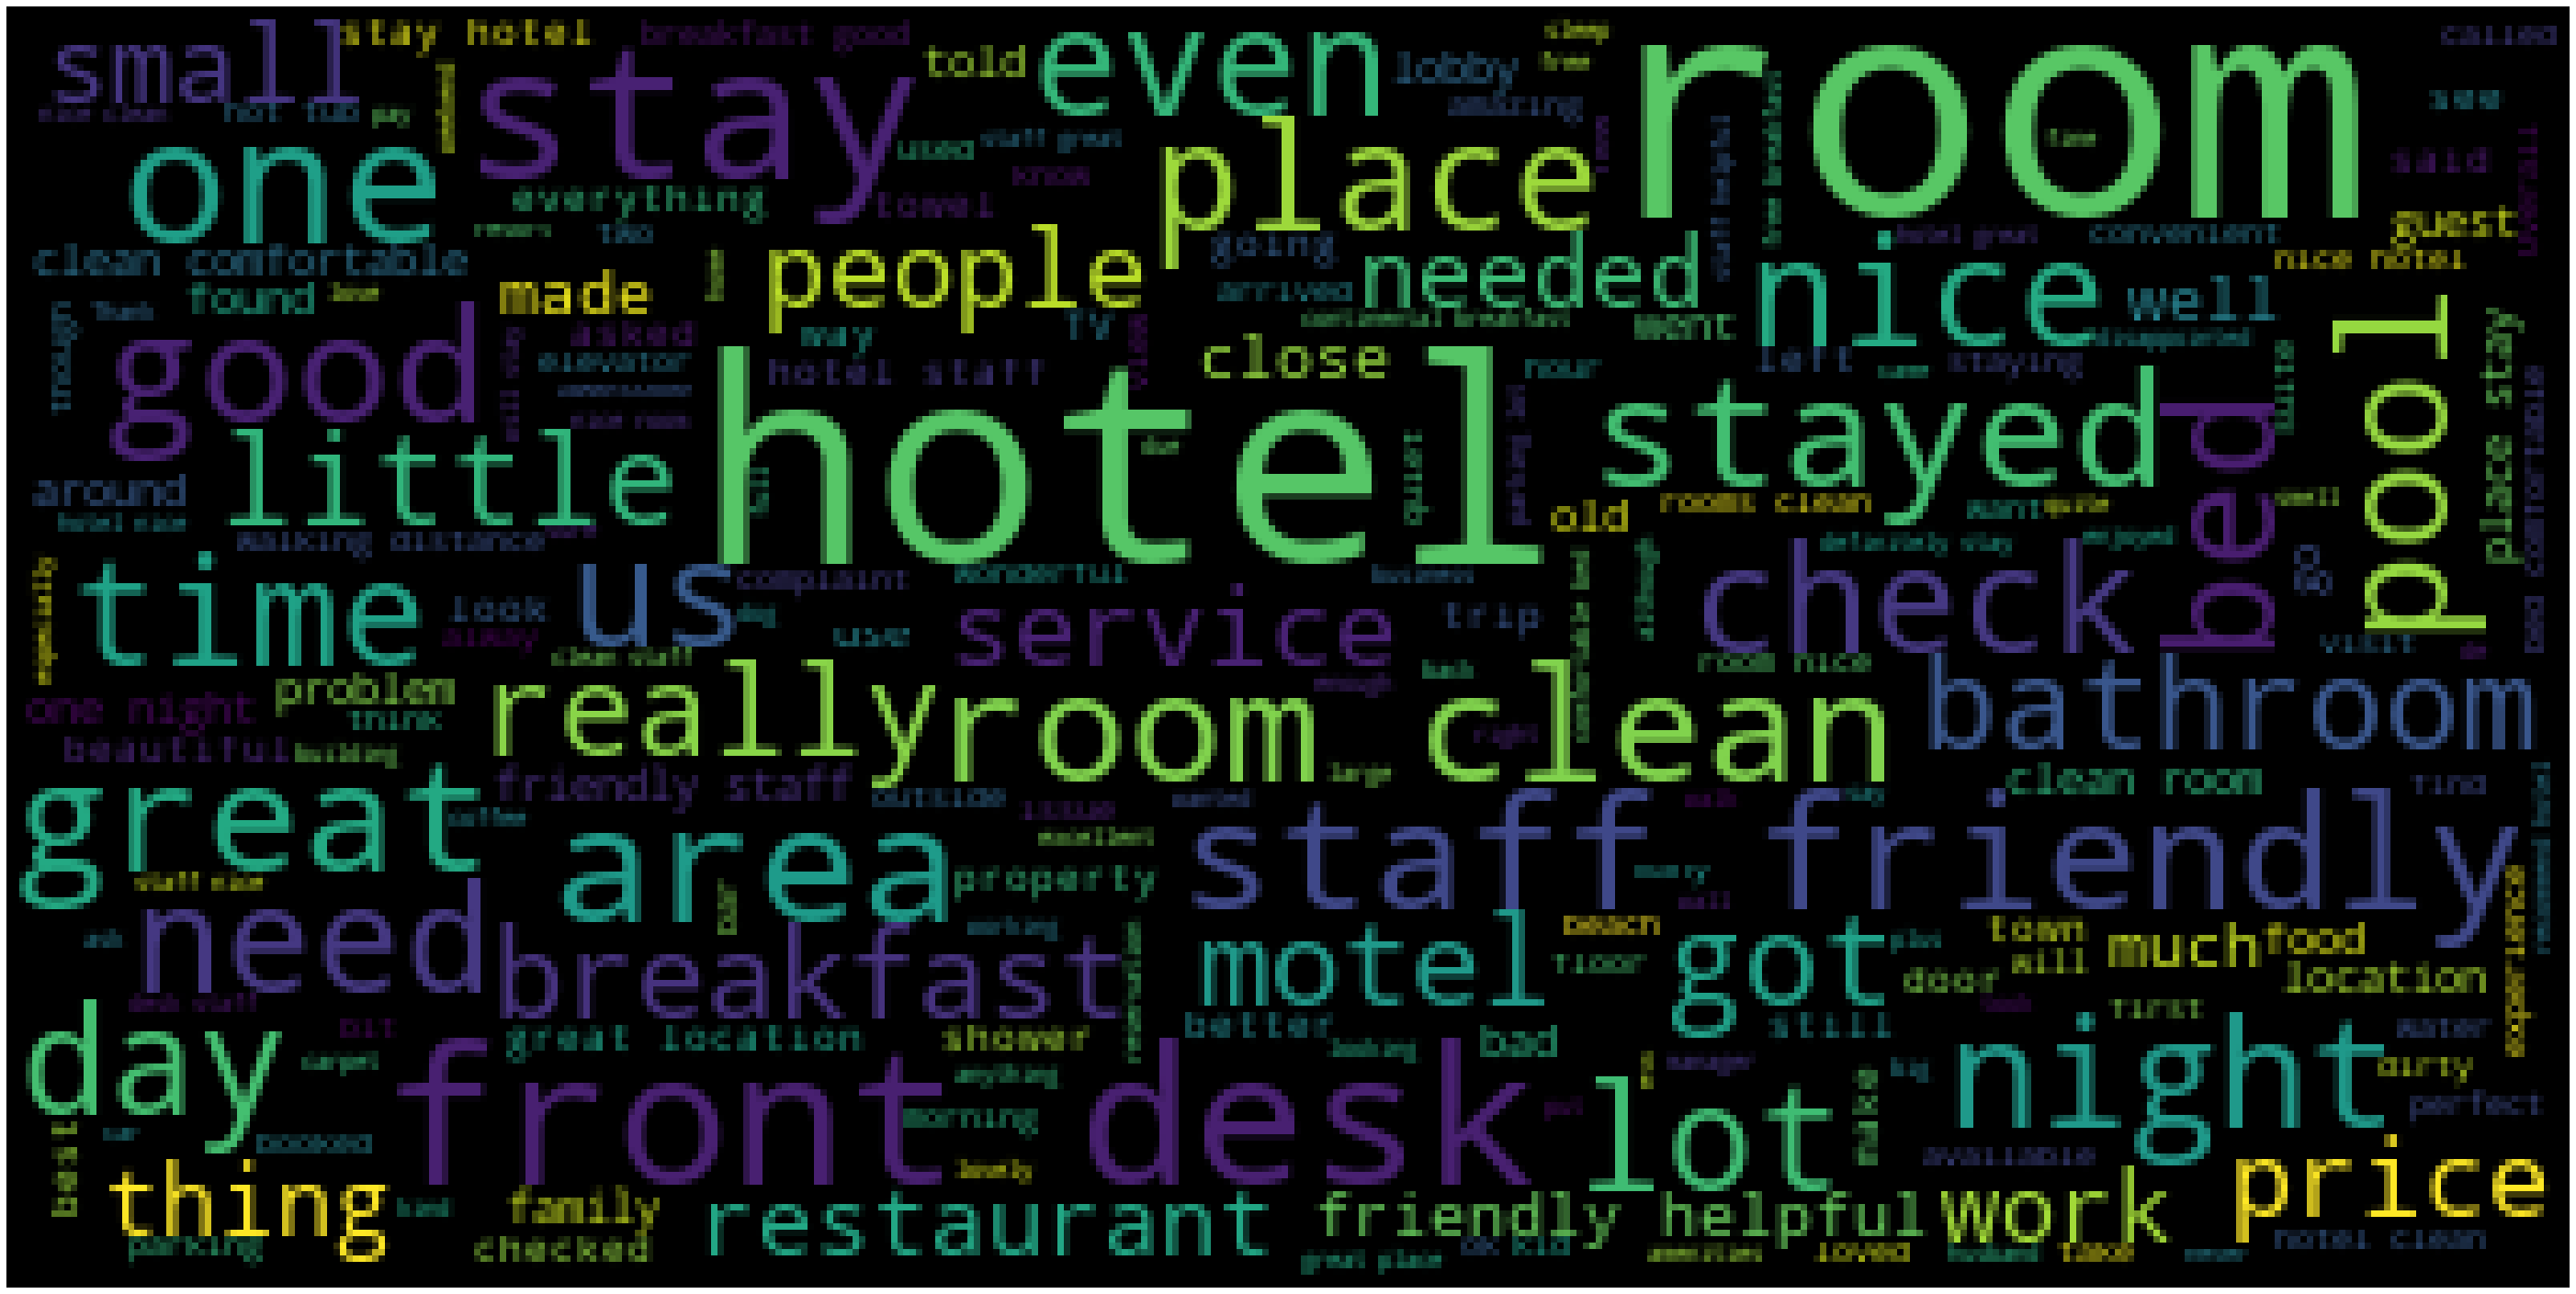

In [0]:
 wc(x_train,'black','Common Words' )

In [0]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer

cv = CountVectorizer()
train_x_counts = cv.fit_transform(x_train)

tfidf = TfidfTransformer()
train_x_tfidf = tfidf.fit_transform(train_x_counts)

In [0]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score


clf = MultinomialNB()
clf.fit(train_x_tfidf, y_train)
clf.score(train_x_tfidf, y_train)

0.5025343004456874

In [0]:
test_x_counts = cv.transform(x_test)
test_x_tfidf = tfidf.transform(test_x_counts)
predict_y = clf.predict(test_x_tfidf)

accuracy_score(y_test, predict_y)

0.428457376031225

In [0]:
from sklearn.linear_model import LogisticRegression

clf = LogisticRegression()
clf.fit(train_x_tfidf, y_train)

clf.score(train_x_tfidf, y_train)

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


0.6968015380582016

In [0]:
test_x_counts = cv.transform(x_test)
test_x_tfidf = tfidf.transform(test_x_counts)
predict_y = clf.predict(test_x_tfidf)

accuracy_score(y_test, predict_y)

0.5364144415860906

In [0]:
# KNN

from sklearn.neighbors import KNeighborsClassifier

clf = KNeighborsClassifier()
clf.fit(train_x_tfidf, y_train)

clf.score(train_x_tfidf, y_train)

0.5235078213755134

In [0]:
test_x_counts = cv.transform(x_test)
test_x_tfidf = tfidf.transform(test_x_counts)
predict_y = clf.predict(test_x_tfidf)

accuracy_score(y_test, predict_y)

0.3029362192850173

In [0]:
!pip install ktrain

     |████████████████████████████████| 25.2MB 1.2MB/s 
     |████████████████████████████████| 421.8MB 40kB/s 
     |████████████████████████████████| 983kB 22.3MB/s 
     |████████████████████████████████| 245kB 57.6MB/s 
     |████████████████████████████████| 573kB 53.5MB/s 
     |████████████████████████████████| 471kB 58.3MB/s 
     |████████████████████████████████| 450kB 50.5MB/s 
     |████████████████████████████████| 3.9MB 47.8MB/s 
     |████████████████████████████████| 890kB 47.3MB/s 
     |████████████████████████████████| 3.7MB 48.5MB/s 
     |████████████████████████████████| 1.0MB 43.2MB/s 
  Created wheel for ktrain: filename=ktrain-0.14.1-cp36-none-any.whl size=25244581 sha256=271489bfb02a014f2dbfaa7f0926af62c71299249ae091b1cfc406f75241bc81
  Stored in directory: /root/.cache/pip/wheels/41/96/c7/c5fd7672fc5d8030ea0cfa16e3400a032a40200a1ee42a98ec
  Created wheel for keras-bert: filename=keras_bert-0.81.0-cp36-none-any.whl size=37913 sha256=0160439296338a3a96d9cbb6f53

In [0]:
import ktrain
from ktrain import text

In [0]:
(x_train,  y_train), (x_test, y_test), preproc = text.texts_from_array(x_train=x_train, y_train=y_train,
                                                                       x_test=x_test, y_test=y_test,
                                                                       class_names=label_list,
                                                                       preprocess_mode='bert',
                                                                       ngram_range=1, 
                                                                       maxlen=350, 
                                                                       max_features=35000)

In [0]:
model = text.text_classifier('bert', train_data=(x_train, y_train), preproc=preproc)

Is Multi-Label? False
maxlen is 350
done.


In [0]:
learner = ktrain.get_learner(model, train_data=(x_train, y_train), batch_size=6)

simulating training for different learning rates... this may take a few moments...
Train on 6699 samples
Epoch 1/1024
6699/6699 [==============================] - 822s 123ms/sample - loss: 1.4223 - accuracy: 0.4162
Epoch 2/1024
 456/6699 [=>............................] - ETA: 12:33 - loss: 4.0438 - accuracy: 0.3158

done.
Please invoke the Learner.lr_plot() method to visually inspect the loss plot to help identify the maximal learning rate associated with falling loss.


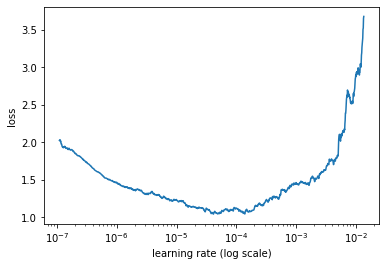

In [0]:
learner.lr_find()
learner.lr_plot()

In [0]:
learner.autofit(3e-5, 5)



begin training using triangular learning rate policy with max lr of 3e-05...
Train on 6699 samples
Epoch 1/5
6699/6699 [==============================] - 821s 122ms/sample - loss: 1.0154 - accuracy: 0.5569
Epoch 2/5
6699/6699 [==============================] - 821s 123ms/sample - loss: 0.7703 - accuracy: 0.6780
Epoch 3/5
6699/6699 [==============================] - 820s 122ms/sample - loss: 0.5898 - accuracy: 0.7604
Epoch 4/5
6699/6699 [==============================] - 822s 123ms/sample - loss: 0.4173 - accuracy: 0.8410
Epoch 5/5
6699/6699 [==============================] - 824s 123ms/sample - loss: 0.2765 - accuracy: 0.9009


In [0]:
learner.validate(val_data=(x_test, y_test))

              precision    recall  f1-score   support

           0       0.62      0.62      0.62       192
           1       0.40      0.29      0.34       226
           2       0.46      0.41      0.43       451
           3       0.48      0.50      0.49       912
           4       0.74      0.77      0.75      1519

    accuracy                           0.60      3300
   macro avg       0.54      0.52      0.53      3300
weighted avg       0.60      0.60      0.60      3300



array([[ 120,   39,   24,    6,    3],
       [  55,   66,   86,   10,    9],
       [  15,   53,  185,  161,   37],
       [   3,    6,   87,  454,  362],
       [   2,    2,   21,  324, 1170]])

In [0]:
import numpy as np


def plot_confusion_matrix(cm,
                          target_names,
                          title='Confusion matrix',
                          cmap=None,
                          normalize=True):
    """
    given a sklearn confusion matrix (cm), make a nice plot

    Arguments
    ---------
    cm:           confusion matrix from sklearn.metrics.confusion_matrix

    target_names: given classification classes such as [0, 1, 2]
                  the class names, for example: ['high', 'medium', 'low']

    title:        the text to display at the top of the matrix

    cmap:         the gradient of the values displayed from matplotlib.pyplot.cm
                  see http://matplotlib.org/examples/color/colormaps_reference.html
                  plt.get_cmap('jet') or plt.cm.Blues

    normalize:    If False, plot the raw numbers
                  If True, plot the proportions

    Usage
    -----
    plot_confusion_matrix(cm           = cm,                  # confusion matrix created by
                                                              # sklearn.metrics.confusion_matrix
                          normalize    = True,                # show proportions
                          target_names = y_labels_vals,       # list of names of the classes
                          title        = best_estimator_name) # title of graph

    Citiation
    ---------
    http://scikit-learn.org/stable/auto_examples/model_selection/plot_confusion_matrix.html

    """
    import matplotlib.pyplot as plt
    import numpy as np
    import itertools

    accuracy = np.trace(cm) / float(np.sum(cm))
    misclass = 1 - accuracy

    if cmap is None:
        cmap = plt.get_cmap('Blues')

    plt.figure(figsize=(8, 6))
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()

    if target_names is not None:
        tick_marks = np.arange(len(target_names))
        plt.xticks(tick_marks, target_names, rotation=45)
        plt.yticks(tick_marks, target_names)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]


    thresh = cm.max() / 1.5 if normalize else cm.max() / 2
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        if normalize:
            plt.text(j, i, "{:0.4f}".format(cm[i, j]),
                     horizontalalignment="center",
                     color="white" if cm[i, j] > thresh else "black")
        else:
            plt.text(j, i, "{:,}".format(cm[i, j]),
                     horizontalalignment="center",
                     color="white" if cm[i, j] > thresh else "black")


    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label\naccuracy={:0.4f}; misclass={:0.4f}'.format(accuracy, misclass))
    plt.show()
  


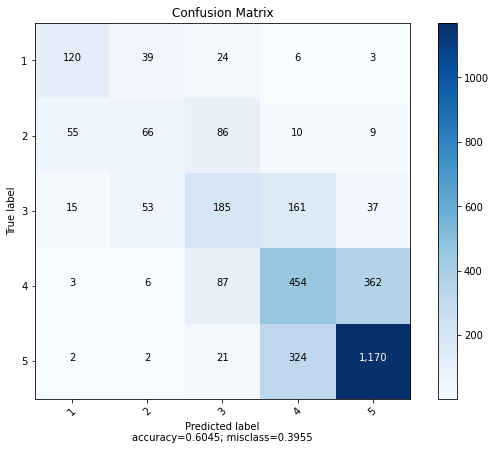

In [0]:
plot_confusion_matrix(cm           = np.array([[ 120,   39,   24,    6,    3],
       [  55,   66,   86,   10,    9],
       [  15,   53,  185,  161,   37],
       [   3,    6,   87,  454,  362],
       [   2,    2,   21,  324, 1170]]), 
                      normalize    = False,
                      target_names = ['1', '2', '3','4','5'],
                      title        = "Confusion Matrix")